<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    _NCProperties: version=1|netcdflibversion=4.6.1|hdf5libversion=1.8.12
    featureType: timeSeries
    title: FRF 8m Array
    summary: USACE Coastal Observation and Analysis Branch (COAB) collected directional wave data using 
 an array of pressure sensors at the Field Research Facility (FRF) in Duck, NC.  The array
 consists of 15 pressure gauges mounted approximately 0.5 m (1.6 ft) off the bottom in the 
 vicinity of the 8-m (26-ft) isobath about 900 m (2,953 ft) offshore and to the north of the 
 research pier.  Directional information is computed from these gauges using an iterative 
 maximum likelihood estimator.

 The location satisfies three constraints. First, it is generally outside the surf zone 
 so that linear wave theory is applicable in data processing. Second, it is in water shallow 
 enough that signals from 3-sec waves, the shortest periods of interest here, are detectable

loaded


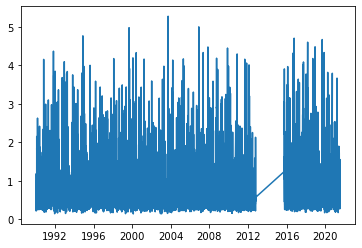

In [5]:
#This is en excserise to look at some wave data available on the Thredds server
#https://chldata.erdc.dren.mil/

#download thread

from netCDF4 import Dataset, num2date 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
waves=Dataset("https://chldata.erdc.dren.mil/thredds/dodsC/frf/oceanography/waves/8m-array/8m-array.ncml")
#print(waves) #this looks at meta data

plt.plot(num2date(waves['time'][:],units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True),waves['waveHs'][:])

print("loaded")




In [2]:
#look at meta data

time=waves['time']

waveHs=waves['waveHs']

#plt.plot(waves['waveHs'][:])
print(time)

#print(waveHs[-1])#print(time[:100])
#print(waveHs[:10])
print(time[:1])


<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: -999.0
    units: seconds since 1970-01-01 00:00:00
    standard_name: time
    long_name: UTC Sample Time
    calendar: gregorian
    short_name: time
    _ChunkSizes: 512
unlimited dimensions: 
current shape = (235869,)
filling off
[6.31152e+08]


18262.0
18628.0
18824.54166666663
235869


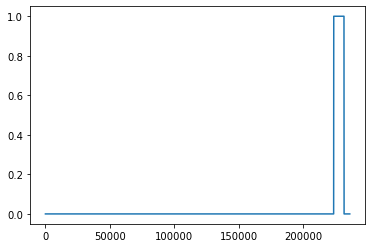

In [6]:
# find the time we want
tt=waves['time']
timedm=num2date(tt[:],units=tt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dtstart=datetime(2020, 1, 1, 0, 0, 0)
dtend=datetime(2021, 1, 1, 0, 0, 0)
#dtstartnum=date2num(dtstart)#looks like this is part of the netCDF4
import matplotlib.dates as dates
dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)
ptime= dates.date2num(timedm)

#checking to see if they all match 
print(dnstart)
print(dnend)
print(ptime[-1])

dates = (ptime >= dnstart) & (ptime <= dnend)
dateselect=time[dates]
waveselect=waveHs[dates]
#newtime=dates.num2date(dateselect)
x=len(dates)

print(x)
plt.plot(dates)
plt.show()



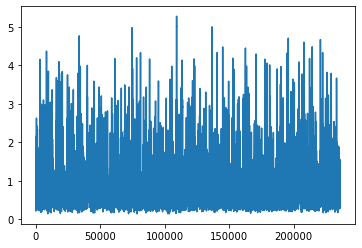

Text(0.5, 1.0, 'waves heights in 2020')

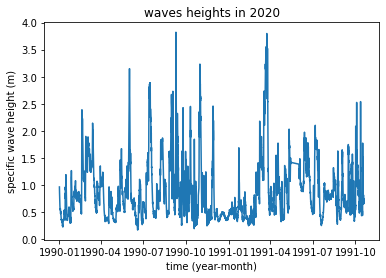

In [7]:
# plot wave data
plt.plot(waveHs) #this plots all wave data
plt.show()
#plt.plot(waveselect)
#plt.show()
#plt.plot(newtime,waveselect)
#plt.show()
plt.plot(num2date(dateselect[:],units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True),waveselect[:])
plt.xlabel('time (year-month)')
plt.ylabel('specific wave height (m)')
plt.title('waves heights in 2020')

In [9]:
#first step in identifying top storms
find=np.where(waveselect>=3.3)
findb= waveselect > 3.3

print(find)
print(findb)



(array([2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
       5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580,
       5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5590, 5592, 5594,
       5595, 5596, 5597, 5598, 5599, 5600, 5601, 5615, 5617], dtype=int64),)
[False False False ... False False False]


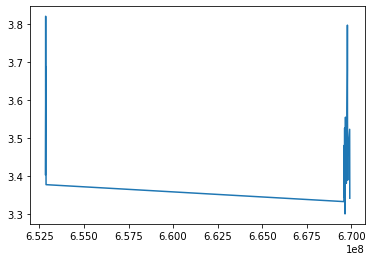

In [10]:
storm1t=dateselect[findb]
storm1h=waveselect[findb]
plt.plot(storm1t,storm1h)

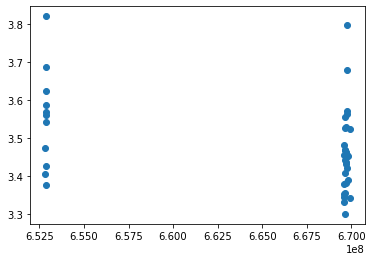

In [11]:
newt = storm1t[storm1h>3.3]
newh = storm1h[storm1h>3.3]
plt.scatter(newt,newh)

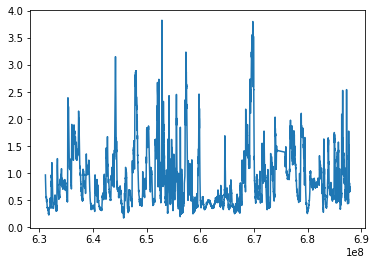

In [12]:
from scipy.signal import argrelextrema
sortId=np.argsort(dateselect)
dateselect=dateselect[sortId]
waveselect=waveselect[sortId]

#this way the x-axis corresponds to the index of x
plt.plot(dateselect-1,waveselect)
plt.show()
maxm = argrelextrema(waveselect, np.greater) #(array([1, 3, 6]),)
minm = argrelextrema(waveselect, np.less) #(array([2, 5, 7]),)

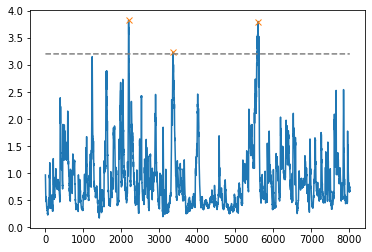

In [13]:
#using the peak threshold method to identify large storms


from scipy.signal import find_peaks

peaks, _ = find_peaks(waveselect, height=3.2, prominence=1)
plt.plot(waveselect)
plt.plot(peaks, waveselect[peaks], "x")
plt.plot(np.zeros_like(waveselect)+3.2, "--", color="gray")#want 3 instead of zeros
plt.show()
#plt.plot(num2date(dateselect[:],units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True),waveselect[:])


In [ ]:
timeres= time[-1] - time[-2]
print(timeres)
#3600v sec ~ 1 hour intervals

[2189 3353 5598]


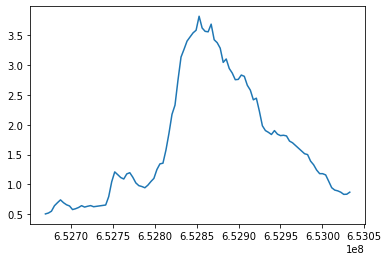

In [14]:
#find time around peaks
print(peaks)
storm1t=dateselect[peaks[0]-48:peaks[0]+48]
storm1h=waveselect[peaks[0]-48:peaks[0]+48]#2day span either side
plt.plot(storm1t,storm1h)
plt.show()

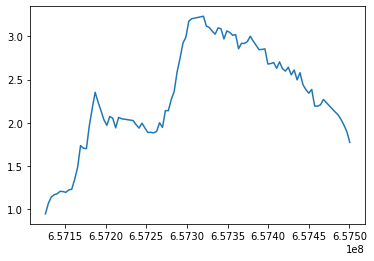

In [15]:
storm2t=dateselect[peaks[1]-48:peaks[1]+48]
storm2h=waveselect[peaks[1]-48:peaks[1]+48]#2day span either side
plt.plot(storm2t,storm2h)
plt.show()






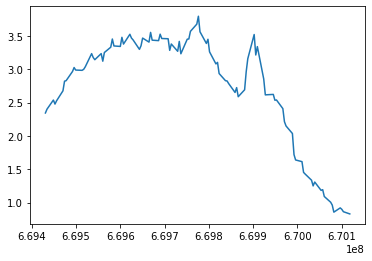

In [16]:
storm3t=dateselect[peaks[2]-48:peaks[2]+48]
storm3h=waveselect[peaks[2]-48:peaks[2]+48]#2day span either side
plt.plot(storm3t,storm3h)
plt.show()

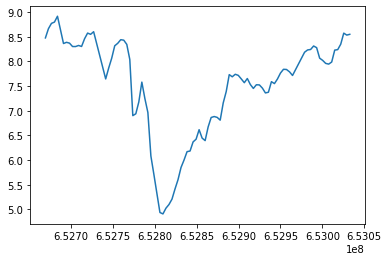

In [17]:
waveTm=waves['waveTm']
storm1p=waveTm[peaks[0]-48:peaks[0]+48]#2day span either side
storm2p=waveTm[peaks[1]-48:peaks[1]+48]#2day span either side
storm3p=waveTm[peaks[2]-48:peaks[2]+48]#2day span either side
plt.plot(storm1t,storm1p)
plt.show()

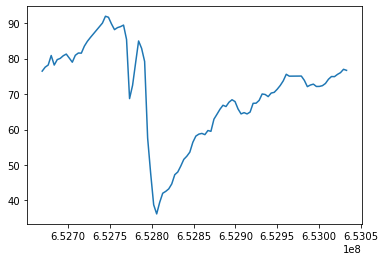

In [18]:
waveDir=waves['waveMeanDirection']
storm1dir=waveDir[peaks[0]-48:peaks[0]+48]#2day span either side
storm2dir=waveDir[peaks[1]-48:peaks[1]+48]#2day span either side
storm3dir=waveDir[peaks[2]-48:peaks[2]+48]#2day span either side
plt.plot(storm1t,storm1dir)

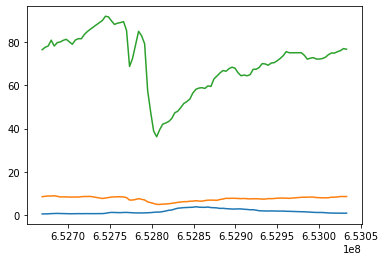

In [19]:
plt.plot(storm1t,storm1h)
plt.plot(storm1t,storm1p)

plt.plot(storm1t,storm1dir)
plt.show()

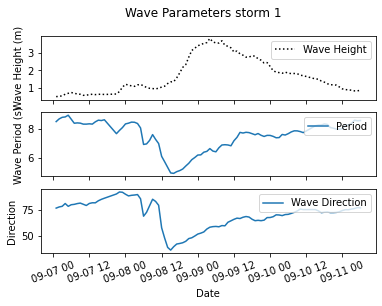

In [20]:
#graph of storm parameters (wave period, height and wave direction)
fig, ax1 = plt.subplots(3, sharex=True)
t2=num2date(storm1t,units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)

ax1[0].plot(t2, storm1h, 'k:',label='Wave Height')
ax1[0].set(ylabel='Wave Height (m)')
ax1[1].plot(t2, storm1p, label='Period')
ax1[1].set(ylabel='Wave Period (s)')
ax1[2].plot(t2, storm1dir, label='Wave Direction')
ax1[2].set(ylabel='Direction')
ax1[2].set(xlabel='Date')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')
ax1[2].legend(loc='upper right')


fig.suptitle('Wave Parameters storm 1')

plt.xticks(rotation=20)
plt.show()

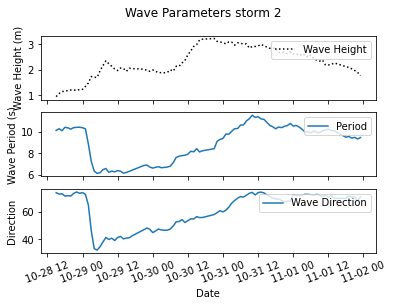

In [21]:

fig, ax1 = plt.subplots(3, sharex=True)
t3=num2date(storm2t,units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)

ax1[0].plot(t3, storm2h, 'k:',label='Wave Height')
ax1[0].set(ylabel='Wave Height (m)')
ax1[1].plot(t3, storm2p, label='Period')
ax1[1].set(ylabel='Wave Period (s)')
ax1[2].plot(t3, storm2dir, label='Wave Direction')
ax1[2].set(ylabel='Direction')
ax1[2].set(xlabel='Date')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')
ax1[2].legend(loc='upper right')



fig.suptitle('Wave Parameters storm 2')

plt.xticks(rotation=20)
plt.show()


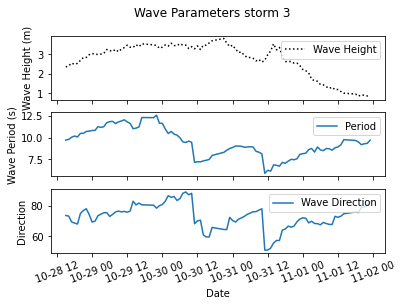

In [22]:

fig, ax1 = plt.subplots(3, sharex=True)
t4=num2date(storm2t,units=waves['time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)

ax1[0].plot(t4, storm3h, 'k:',label='Wave Height')
ax1[0].set(ylabel='Wave Height (m)')
ax1[1].plot(t4, storm3p, label='Period')
ax1[1].set(ylabel='Wave Period (s)')
ax1[2].plot(t4, storm3dir, label='Wave Direction')
ax1[2].set(ylabel='Direction')
ax1[2].set(xlabel='Date')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')
ax1[2].legend(loc='upper right')



fig.suptitle('Wave Parameters storm 3')

plt.xticks(rotation=20)
plt.show()